In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os, sys

In [4]:
xmin, xmax = -1.5, 1.5

In [7]:
def get_gauss_sphere(n_data, n_dim=2, mu=1., sigma=.1, half=False):
    R = np.abs(sigma * np.random.randn(n_data) + mu)
    phi = np.random.rand(n_data, n_dim - 1)
    phi[:, -1] *= 2*np.pi if not half else np.pi
    phi[:, :-1] *= np.pi

    samples = self.getCartesian(R, phi)
    return samples

def getCartesian(R, phi):
    # recursively build the coordinate transformation from (R, phi0, phi1...) to (x0, x1, x2...)
    n_data = np.shape(R)[0]
    n_dim = np.shape(phi)[1] + 1
    samples = np.zeros((n_data, n_dim))
    expr = R
    for i in range(n_dim - 1):
        samples[:, i] = expr * np.cos(phi[:, i])
        expr = expr * np.sin(phi[:, i])
    samples[:, -1] = expr
    return samples

def getSpherical(samples):
    n_dim = np.shape(samples)[1]
    R = get_R(samples)
    phi = np.zeros_like(samples[:,:-1])

    # calculate angles
    for i in range(0,n_dim-1):
        phi[:,i] = np.arccos(samples[:,i] / get_R(samples[:,i:]))        
        phi[:,-1] = 2*np.arctan2( samples[:,-1], samples[:,-2] + get_R(samples[:,-2:]))

    # rescale angles to be positive
    phi = (phi + 2*np.pi) % (2*np.pi)
    return R, phi
def get_R(data):
    return np.sum(data ** 2, axis=1) ** .5

In [81]:
def rejectionSampling(n_data, n_dim=2, mu=1., sigma=.1, half=False, batch_size = 100000):
    samples = np.zeros((0, n_dim))
    acc_rates = []
    while np.shape(samples)[0] < n_data:
        x = np.random.uniform(low=xmin, high=xmax, size=(batch_size, n_dim))
        def p(x):
            return 1/(2*np.pi*sigma**2)**(n_dim/2) * np.exp(-(np.sum(x**2, axis=1)**.5-mu)**2 / (2*sigma**2))
        px = p(x)
        y = np.random.uniform(low=0., high=np.max(px), size=batch_size)
        idx = np.where(y < px)[0]
        samples = np.append(samples, x[idx,:], axis=0)
        acc_rates = np.append(acc_rates, len(idx) / batch_size)
    samples = samples[:n_data, :]
    print(f"Sampled {n_data} events with acceptance rate {np.mean(acc_rates):.2e}")
    return samples

In [126]:
samples = rejectionSampling(100000, n_dim=5)
R, phi = getSpherical(samples)

Acceptance rate: 2.87e-02


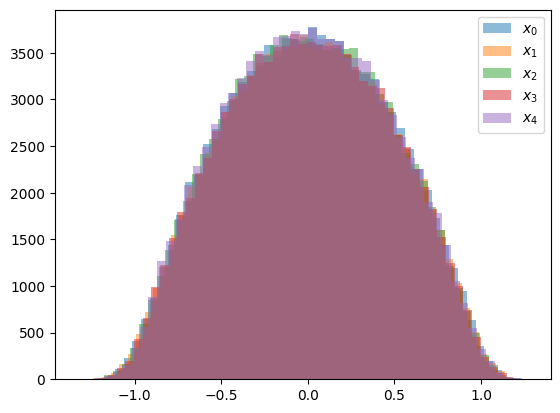

In [121]:
for i in range(np.shape(samples)[1]):
    plt.hist(samples[:,i], bins=50, alpha=.5, label=r"$x_{%s}$" % i)
plt.legend()
plt.savefig("marg.pdf", bbox_inches="tight")
plt.show()

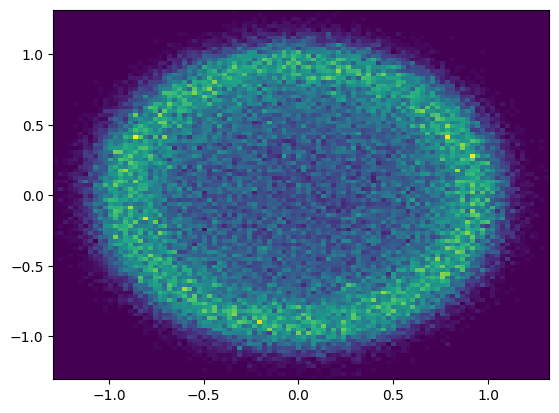

In [91]:
plt.hist2d(samples[:,0], samples[:,1], bins=100)
plt.show()

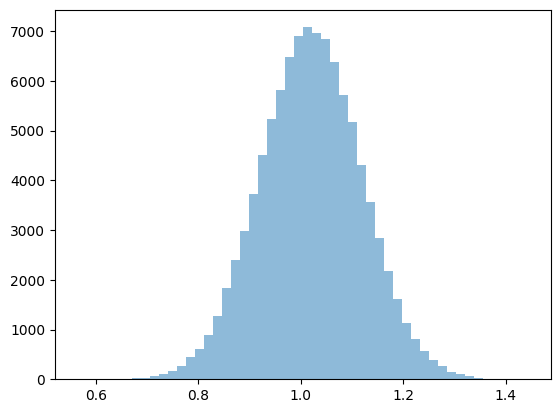

In [94]:
plt.hist(R, bins=50, alpha=.5)
plt.show()

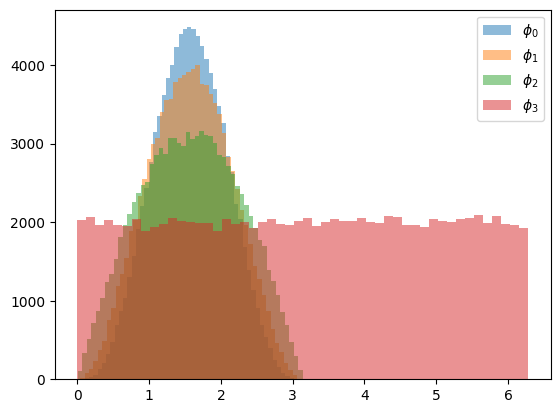

In [122]:
for i in range(np.shape(phi)[1]):
    plt.hist(phi[:,i], bins=50, alpha=.5, label=r"$\phi_{%s}$" % i)
plt.legend()
plt.savefig("ang.pdf", bbox_inches="tight")
plt.show()